#### General setup.
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

%matplotlib inline

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 3)

<br>

#### Loading the data.
___

In [3]:
# unzip the file containing data
zipfile.ZipFile('../Data/names.zip').extractall('.')

In [4]:
# list all files
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [5]:
# checking oone of the files
open('names/yob2011.txt', 'r').readlines()[:10]

['Sophia,F,21816\n',
 'Isabella,F,19870\n',
 'Emma,F,18777\n',
 'Olivia,F,17294\n',
 'Ava,F,15480\n',
 'Emily,F,14236\n',
 'Abigail,F,13229\n',
 'Madison,F,12360\n',
 'Mia,F,11512\n',
 'Chloe,F,10970\n']

In [6]:
# loading the same file with pandas
names2011 = pd.read_csv('names/yob2011.txt', names=['name', 'sex', 'number'])
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [7]:
# creating a list of data from all files by year
names_all = []

for year in range(1880, 2015):
    names_all.append(pd.read_csv(f'names/yob{year}.txt', names=['name', 'sex', 'number']))
    names_all[-1]['year'] = year
    
# feeding the list to pandas     
all_years = pd.concat(names_all)

In [8]:
all_years.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [9]:
all_years.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


<br>

#### Popularity.
___

In [10]:
all_years_indexed = all_years.set_index(['sex', 'name', 'year']).sort_index()
all_years_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

In [11]:
all_years_indexed.loc['F', 'Mary']

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2010,2862
2011,2701
2012,2565


In [12]:
def plot_name(sex, name):
    data = all_years_indexed.loc[sex,name]
    
    plt.plot(data.index, data.values)
    plt.title(name)

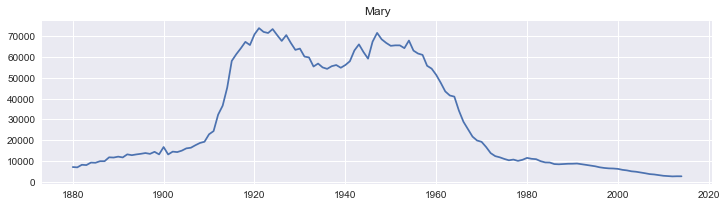

In [13]:
plot_name('F', 'Mary')

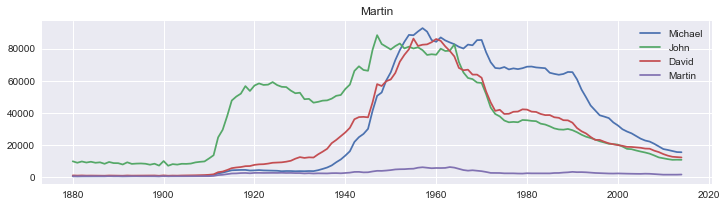

In [14]:
names = ['Michael', 'John', 'David', 'Martin']

for name in names:
    plot_name('M', name)

plt.legend(names);

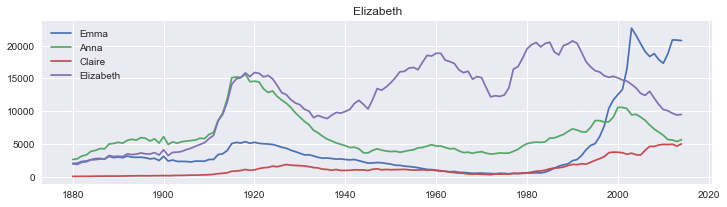

In [15]:
names = ['Emma', 'Anna', 'Claire', 'Elizabeth']

for name in names:
    plot_name('F', name)
    
plt.legend(names);

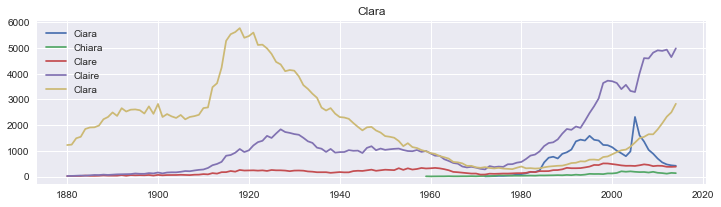

In [16]:
names = ['Ciara', 'Chiara', 'Clare', 'Claire', 'Clara']

for name in names:
    plot_name('F', name)
    
plt.legend(names);

In [17]:
all_years_indexed.loc['F'].loc[names].head()

number
name  year        
Ciara 1972       5
      1974      16
      1975      26
      1976      26
      1977      36

In [18]:
all_years_indexed.loc['F'].loc[names].unstack(level=0).head()

number                            
name  Ciara Chiara Clare Claire   Clara
year                                   
1880    NaN    NaN  15.0   21.0  1226.0
1881    NaN    NaN  20.0   23.0  1242.0
1882    NaN    NaN  21.0   30.0  1490.0
1883    NaN    NaN  22.0   38.0  1548.0
1884    NaN    NaN  38.0   33.0  1852.0

In [19]:
variants = all_years_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)
variants.head()

number                            
name  Ciara Chiara Clare Claire   Clara
year                                   
1880    0.0    0.0  15.0   21.0  1226.0
1881    0.0    0.0  20.0   23.0  1242.0
1882    0.0    0.0  21.0   30.0  1490.0
1883    0.0    0.0  22.0   38.0  1548.0
1884    0.0    0.0  38.0   33.0  1852.0

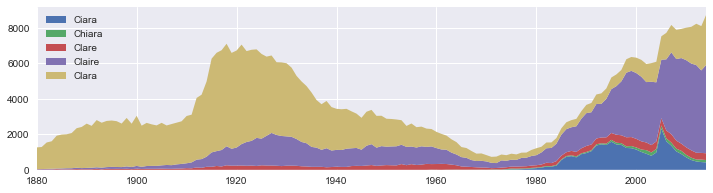

In [23]:
plt.stackplot(variants.index, variants.values.T)
plt.legend(names, loc=2)
plt.xlim(1880, 2014);

<br>

___
#### End.